# Support Vector Machines (SVM) – Regression

### What is SVM?
- Support Vector Machine (SVM) is a supervised learning algorithm that finds the optimal hyperplane which best separates data points of different classes in the feature space.
- SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.
- It finds 2 points in the data set from where it passes an plane and the points are the outermost points of the data means the data should come inside the two points.
- The distance between the two data points should be minimun while choosing teh points.
- Support Vector Regression (SVR) is a supervised learning algorithm based on Support Vector Machines, used for regression tasks (predicting continuous values).
- Unlike traditional regression models (like linear regression that minimizes squared error), SVR tries to fit the best line within a margin of tolerance (called the ε-tube) around the actual outputs.

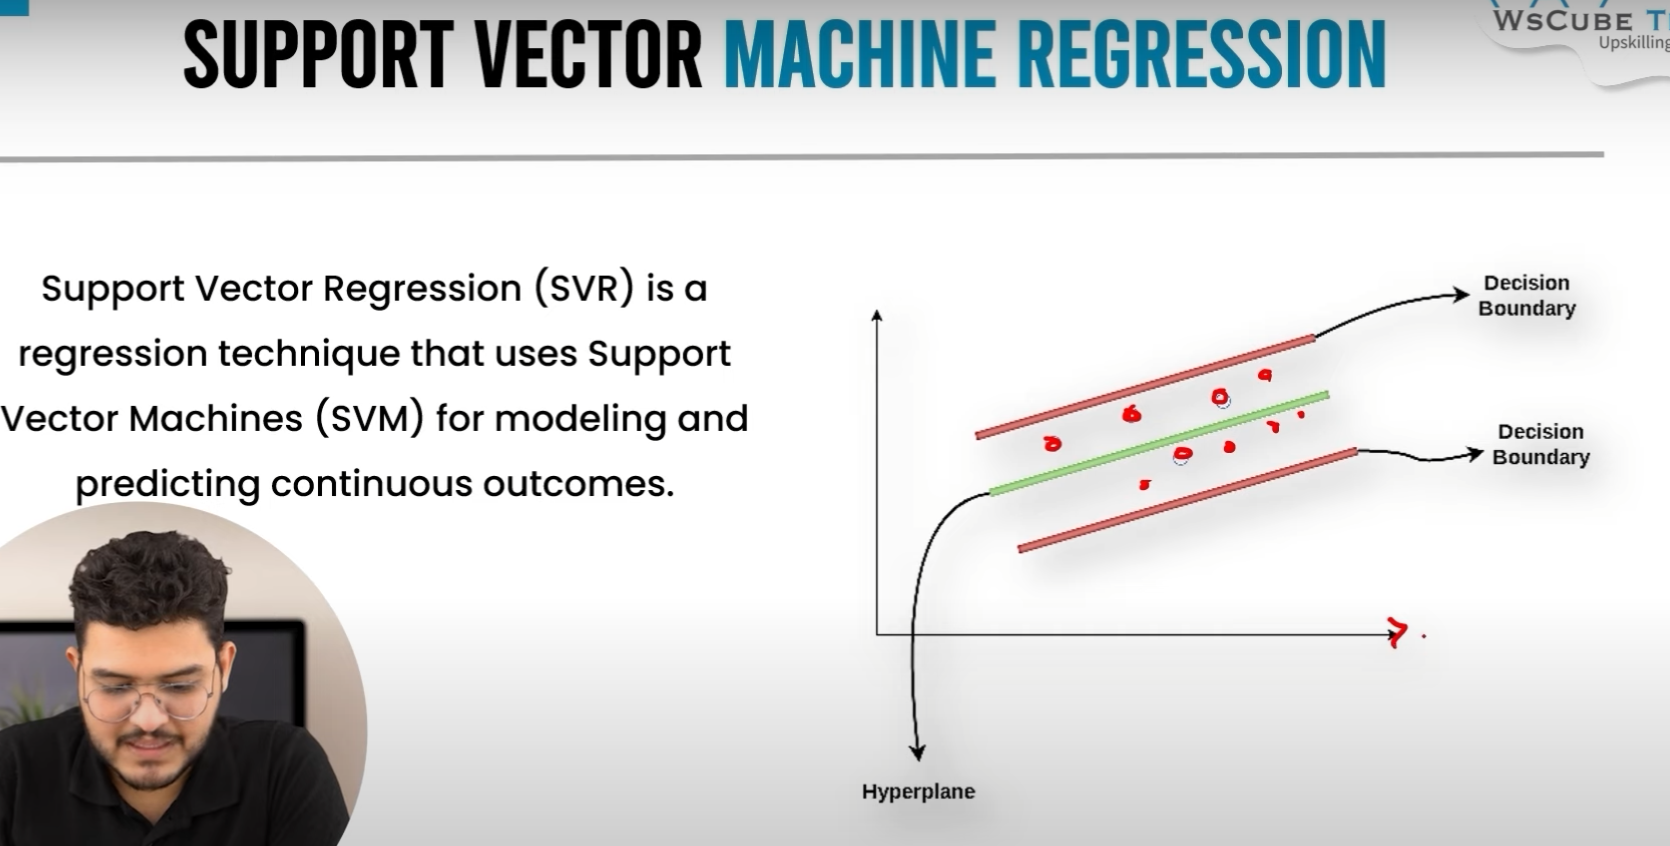

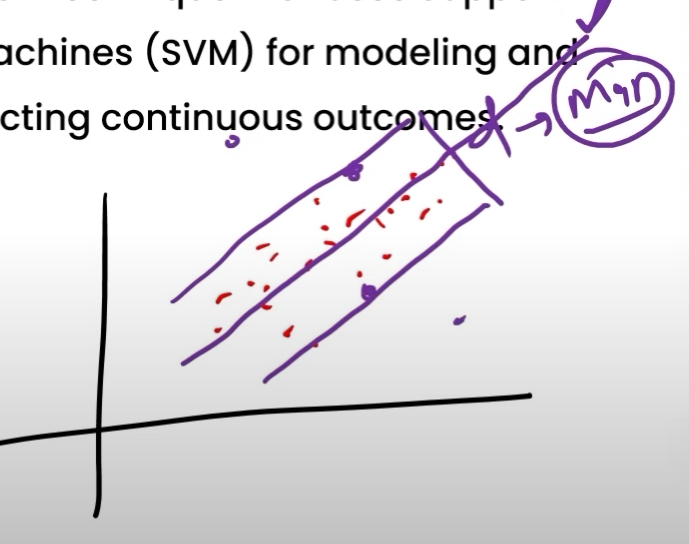

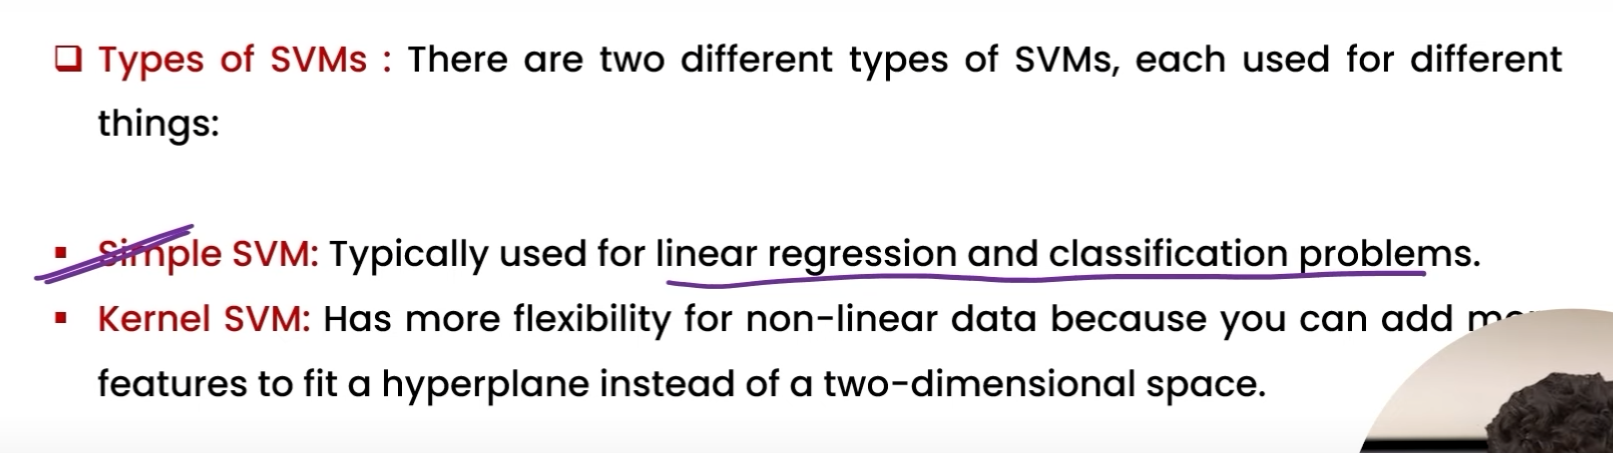

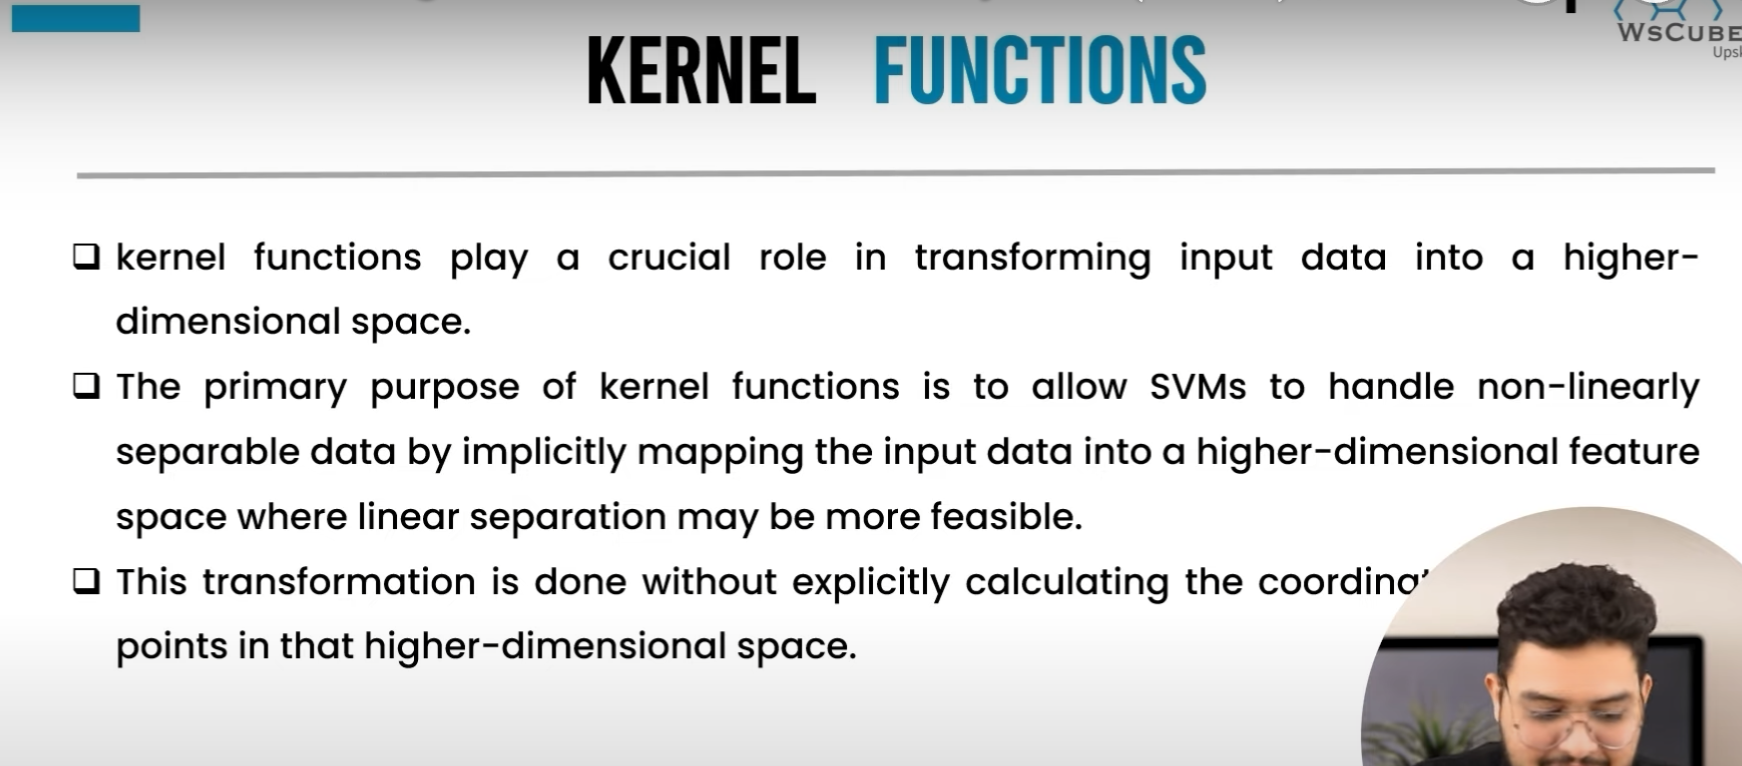

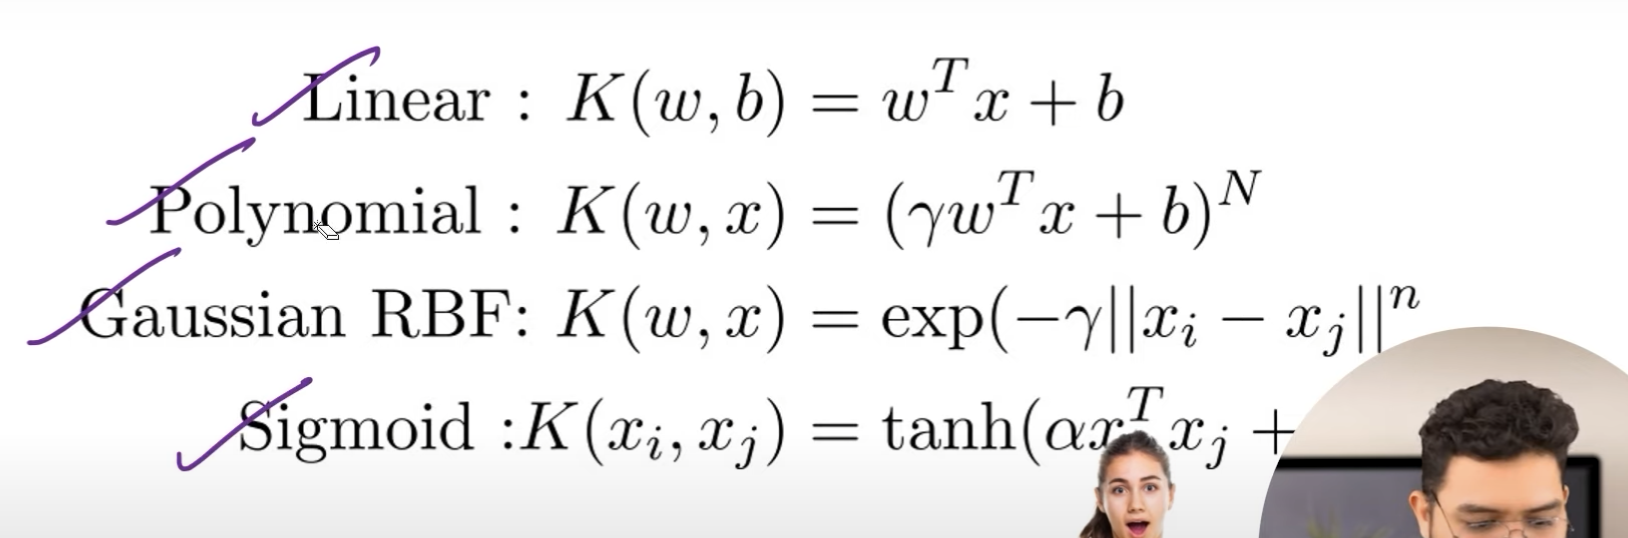

### Mathematical Formulation (Linear SVM)

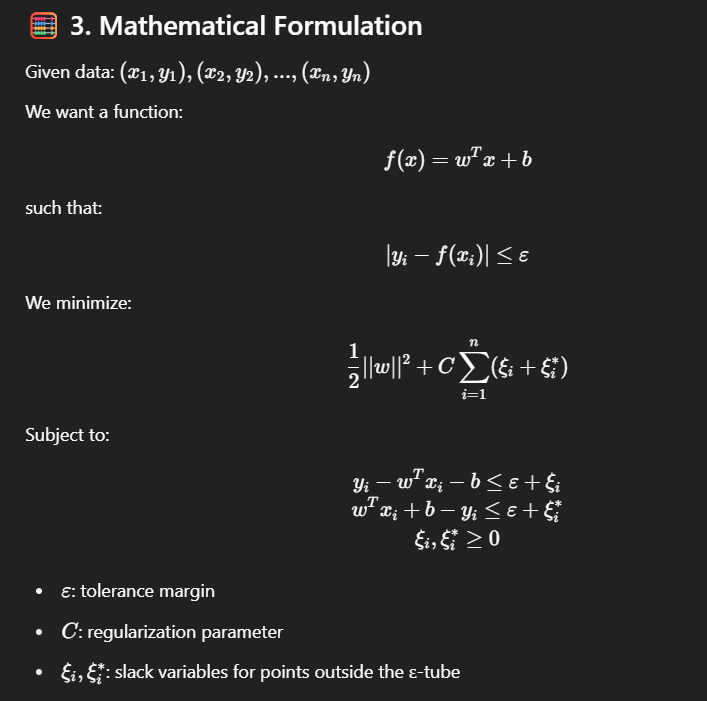


### Soft Margin SVM (with Slack Variable)

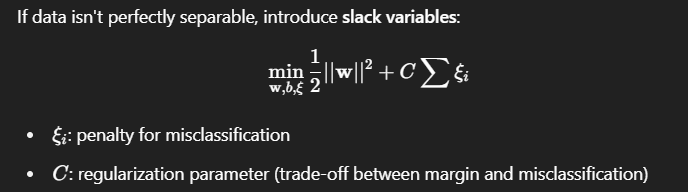
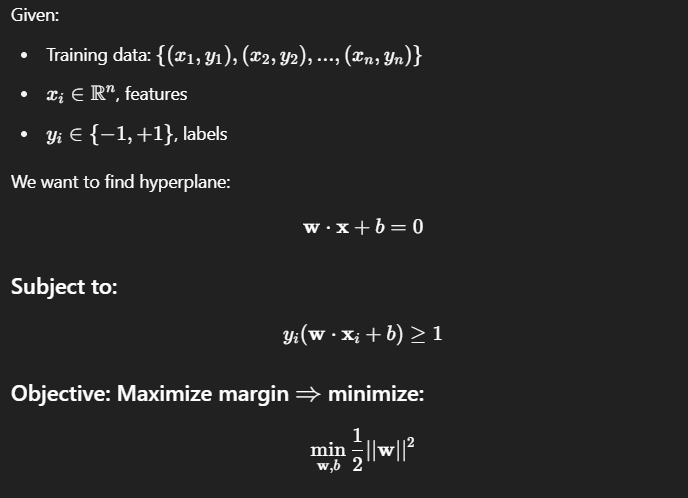

### Kernel Trick (for Nonlinear Data)
- When data is not linearly separable, SVM uses kernel functions to project data into a higher-dimensional space where a hyperplane can separate the data.
- Common Kernels:

| Kernel         | Equation                                  | 
| -------------- | ----------------------------------------- | 
| Linear         | $K(x, x') = x \cdot x'$                   | 
| Polynomial     | $K(x, x') = (x \cdot x' + c)^d$           | 
| RBF (Gaussian) | ( K(x, x') = \exp\left(-\gamma x - x'^2\right)) |
| Sigmoid        | $K(x, x') = \tanh(\alpha x \cdot x' + c)$ |  


### Important Parameters in sklearn.SVC

| Parameter | Description                                                |
| --------- | ---------------------------------------------------------- |
| `kernel`  | Type of kernel: `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'` |
| `C`       | Regularization strength (smaller = wider margin)           |
| `gamma`   | Kernel coefficient for `'rbf'`, `'poly'`, `'sigmoid'`      |
| `degree`  | Degree of polynomial kernel                                |


# Implementation ChatGPT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic non-linear data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(100)

# Fit SVR with RBF Kernel
svr = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.5)
svr.fit(X, y)

# Predict
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = svr.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y, svr.predict(X)))
print("MSE:", mean_squared_error(y, svr.predict(X)))

R² Score: 0.9366298390715098
MSE: 0.03178043752588842


# Visualize SVM Decision Boundary (2D)

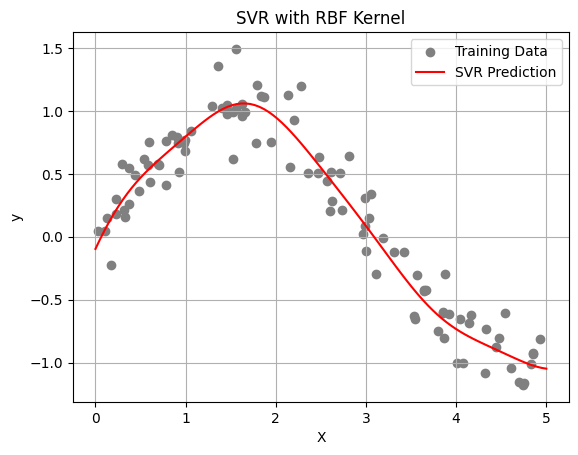

In [2]:
# Visualization
plt.scatter(X, y, color='gray', label='Training Data')
plt.plot(X_test, y_pred, color='red', label='SVR Prediction')
plt.title("SVR with RBF Kernel")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

----

# Implementation From YouTube

In [3]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [4]:
ds = pd.read_csv('placement-dataset.csv')
ds.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


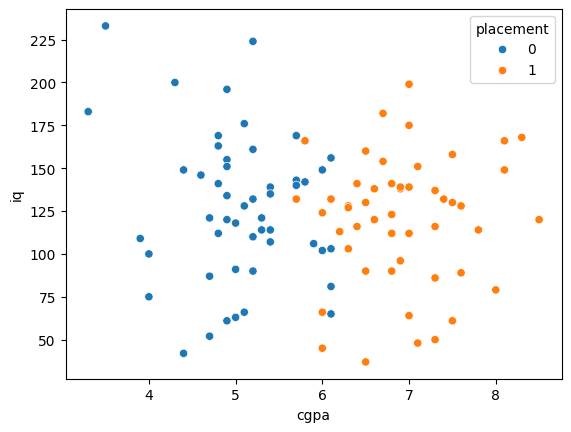

In [5]:
sns.scatterplot(x='cgpa', y= 'iq', data= ds, hue= 'placement')
plt.show()

In [6]:
x = ds.drop(columns=['placement'])
y = ds['placement']
x, y

(    cgpa   iq
 0    6.8  123
 1    5.9  106
 2    5.3  121
 3    7.4  132
 4    5.8  142
 ..   ...  ...
 95   4.3  200
 96   4.4   42
 97   6.7  182
 98   6.3  103
 99   6.2  113
 
 [100 rows x 2 columns],
 0     1
 1     0
 2     0
 3     1
 4     0
      ..
 95    0
 96    0
 97    1
 98    1
 99    1
 Name: placement, Length: 100, dtype: int64)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [29]:
# Train linear SVM
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [30]:
# Predict
y_pred = model.predict(X_test)

In [31]:
model.score(X_test, y_test)*100

65.05146533598439

In [32]:
model.score(X_train, y_train)*100

67.1575563903327

C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


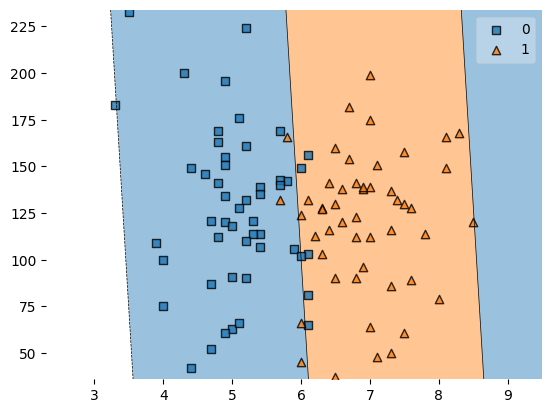

In [33]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = model)
plt.show()

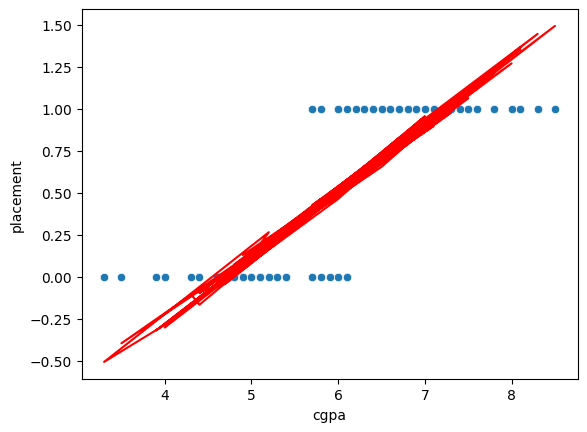

In [35]:
sns.scatterplot(x= 'cgpa', y='placement', data= ds)
plt.plot(ds['cgpa'], model.predict(x), color= 'red')
plt.show()